# МИНИ ПРОЕКТ

Представлен набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.
Имеются следующие поля:

- Rank - место по объему продаж
- Name - название игры
- Platform - платформа, на которой выпущена игра
- Year - год релиза
- Genre - жанр
- Publisher - издатель
- NA_Sales - продажи в Северной Америке, в млн
- EU_Sales - продажи в Европе, в млн
- JP_Sales - продажи в Японии, в млн
- Other_Sales - продажи в остальном мире, в млн
- Global_Sales - продажи по всему миру, в млн

In [48]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy import stats

sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

In [4]:
games = pd.read_csv('games.csv')

In [5]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
games.shape

(16598, 11)

In [9]:
games.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [10]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
print(int(True))
print(int(False))
print(int(True+False))

1
0
1


In [12]:
games.dropna(inplace=True)

In [13]:
games.shape

(16291, 11)

In [14]:
games.Year

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16291, dtype: float64

In [67]:
games['Year'] = games['Year'].astype('int')

In [65]:
games['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int32

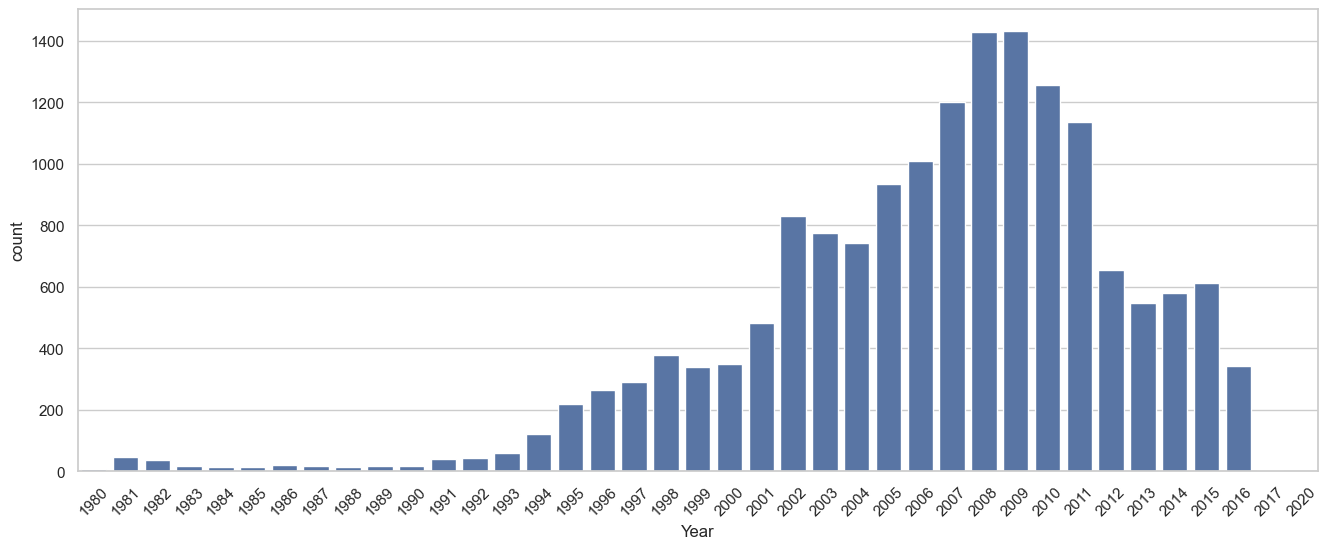

In [26]:
sns.countplot(x=games.Year)
plt.xticks(rotation=45)
plt.show()

In [28]:
games.query("Year <= 2007").shape[0]/16291, games.query ("Year > 2007").shape[0]/16291

(0.5093609968694371, 0.4906390031305629)

In [68]:
games['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [31]:
mode(games.Year)

ModeResult(mode=2009, count=1431)

In [32]:
games.Year.value_counts().reset_index().head()

,Year,count
0,2009,1431
1,2008,1428
2,2010,1257
3,2007,1201
4,2011,1136


In [64]:
games['Platform'].value_counts(normalize=True).mul(100).to_frame('pct').reset_index()

,Platform,pct
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508
7,PC,5.757780
8,XB,4.929102
9,GBA,4.824750


In [63]:
platforms = games['Platform'].value_counts(normalize=True).mul(100).to_frame('pct')
platforms.head()

,pct
Platform,
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735


In [38]:
platforms.query("pct > 7").index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [62]:
games['Publisher'].value_counts().head(10)


Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: count, dtype: int64

In [59]:
games['Publisher'].mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [69]:
games['Publisher'].describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

In [71]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,0.265647,0.147731,0.078833,0.048426,0.540910
median,0.080000,0.020000,0.000000,0.010000,0.170000
std,0.822432,0.509303,0.311879,0.190083,1.567345


In [72]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


<Axes: xlabel='Genre', ylabel='JP_Sales'>

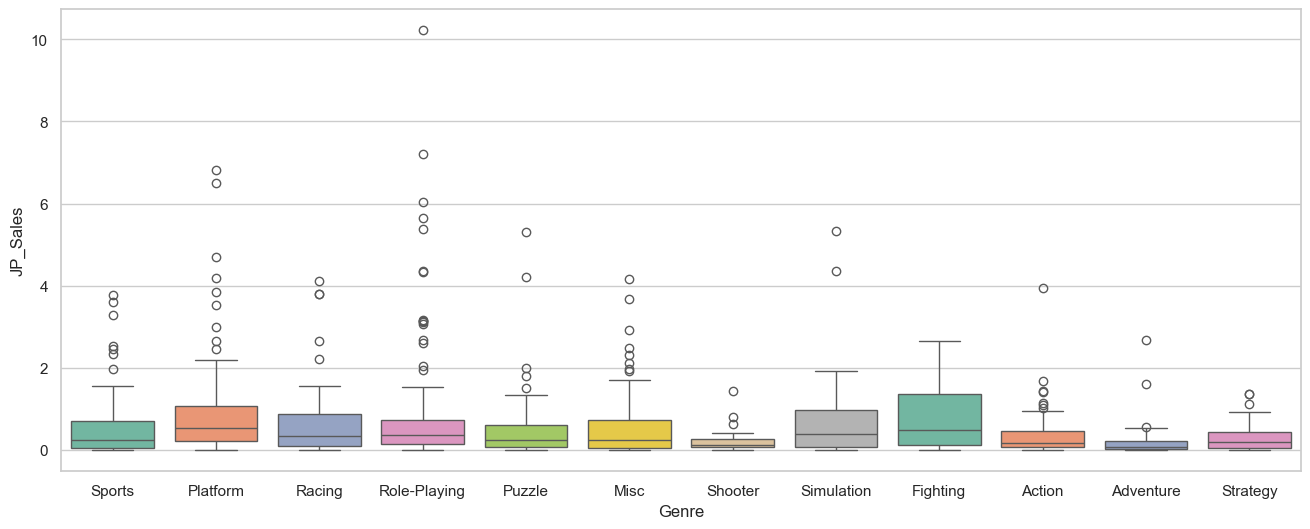

In [85]:
sns.boxplot(data=games.query("Publisher=='Nintendo'"), x='Genre', y='JP_Sales' ,hue='Genre', palette="Set2")      
  


In [75]:
(games.query("Publisher=='Nintedo' and Genre in ['Simulation', 'Fighting']")
     .groupby('Genre').agg({"JP_Sales" : "mean"})

,JP_Sales
Genre,


<Axes: xlabel='Genre', ylabel='JP_Sales'>

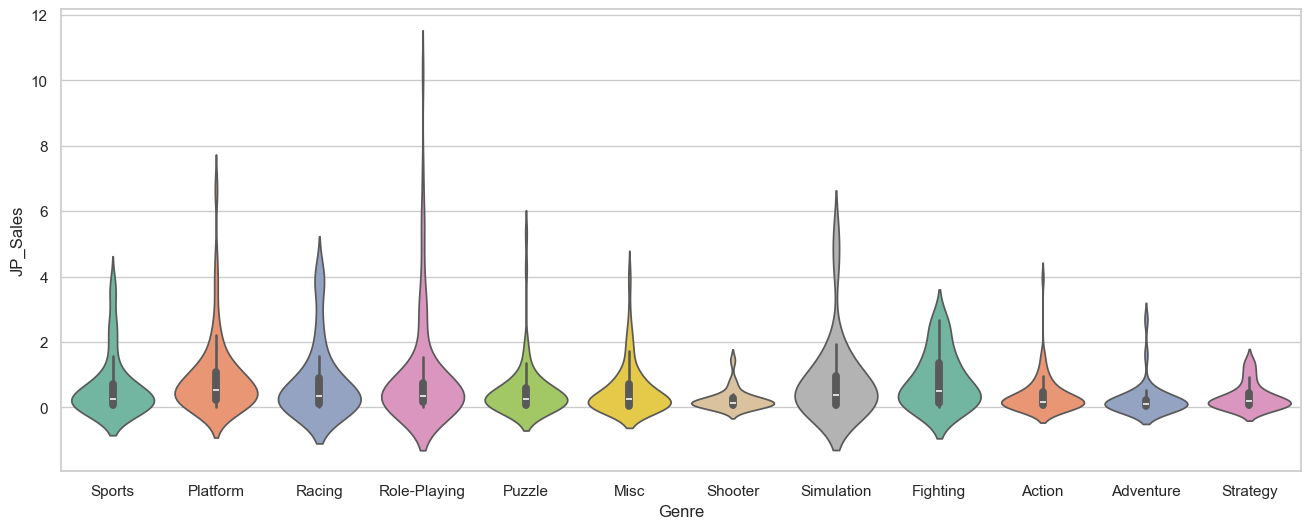

In [88]:
sns.violinplot(data=games.query("Publisher=='Nintendo'"), x='Genre', y='JP_Sales' ,hue='Genre', palette="Set2")      
  


C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.7% of the points canno

<Axes: xlabel='Genre', ylabel='JP_Sales'>

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


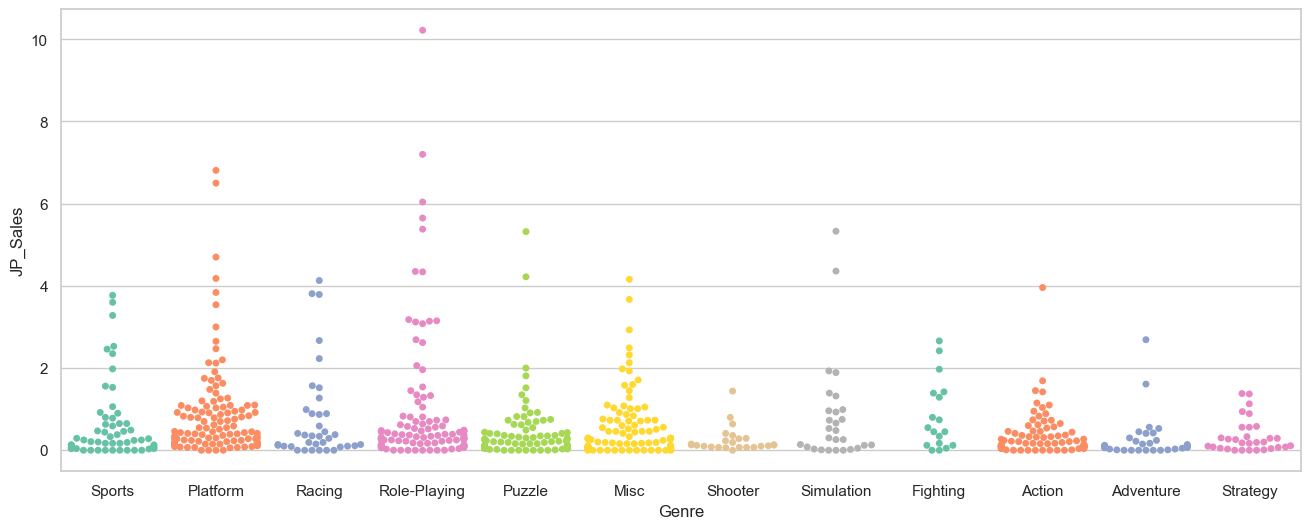

In [103]:
sns.swarmplot(data=games.query("Publisher=='Nintendo'"), x='Genre', y='JP_Sales' ,hue='Genre', palette="Set2")      

In [100]:
df = (games.query("Publisher=='Nintendo'")
      .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")
      .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index())

In [101]:
df

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


<Axes: xlabel='Year', ylabel='Global_Sales'>

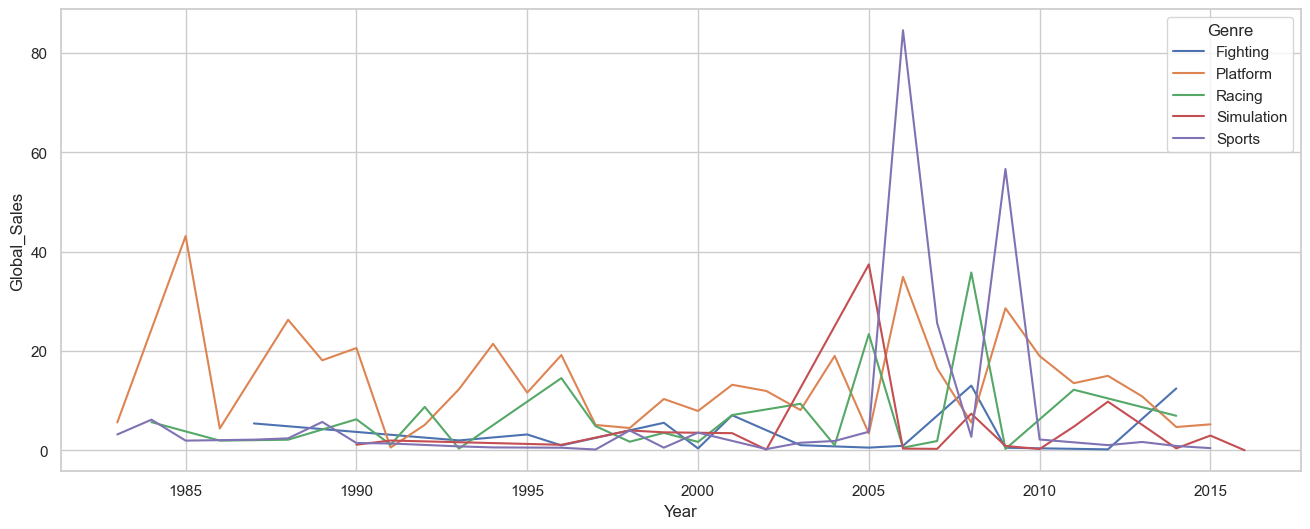

In [102]:
sns.lineplot(data=df, x='Year', y='Global_Sales', hue = 'Genre')